<a href="https://colab.research.google.com/github/AyorindeTayo/artificial-neural-network-to-predict-the-hardness-of-the-welding-duplex-stainless-steel/blob/master/Copy_of_Copy_of_Model(1)_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This notebook is about building an artificial neural network to predict the hardness of the welding duplex stainless steel. All our codes are written in the notebook offered by google colab, a free cloud based service offered by Google. It provides us with an online GPU that helps run our codes without too much struggles. It is very handy to build deep learning models with librairies like Keras, TensorFlow, PyTorch and OpenCV. In this work, we mainly use Keras, TensorFlow and the other usual python's librairies such as pandas, numpy and matplotlib.

# Updating to Tensorflow 2 and Installation of tensorflow docs

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0 #

In [0]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-t2giiqbp
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-t2giiqbp
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80383 sha256=6e67e1b83321c83ed7d3100759bdf94154869fd78e3ff1b13f0e2b3775630844
  Stored in directory: /tmp/pip-ephem-wheel-cache-yatqc4gf/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


# Importing the necessary librairies

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


# A quick exploratory data analysis

In [0]:
from google.colab import files
files.upload()

Saving data_1004.xlsx to data_1004 (1).xlsx


{'data_1004.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xa7\x0c\xebyh\x01\x00\x00\r\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
df.isna().sum()

S-temp       0
S-time       0
Wel-power    0
Wel-speed    0
Hardness     0
dtype: int64

In [0]:
dataset = df.dropna()

In [0]:
df=pd.read_excel('data_1004.xlsx')
df.head()


,S-temp,S-time,Wel-power,Wel-speed,Hardness
0,1000,5,1500,3,343.7
1,1000,5,1500,3,350.1
2,1000,5,1500,3,351.7
3,1000,5,1500,3,365.6
4,1000,5,1500,3,337.5


# Preparation of the data for training

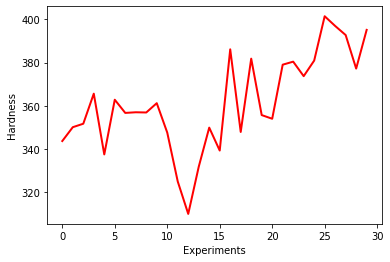

<Figure size 432x288 with 0 Axes>

In [0]:

plt.plot(df.index, df['Hardness'], color='r', lw=2)
plt.xlabel('Experiments')
plt.ylabel('Hardness')
plt.show()
plt.savefig('name.pdf')
files.download('name.pdf')

Split the data into train and test




We will use the test set in the final evaluation of our model

In [0]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

We want to take a look at the overall statistics

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("Hardness")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
S-temp,24.0,1000.000000,83.405766,900.0,900.0,1000.0,1100.0,1100.0
S-time,24.0,6.666667,2.407717,5.0,5.0,5.0,10.0,10.0
Wel-power,24.0,1733.333333,209.899907,1500.0,1500.0,1700.0,2000.0,2000.0
Wel-speed,24.0,2.666667,0.481543,2.0,2.0,3.0,3.0,3.0


SPLIT FEATURES FROM LABELS

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [0]:
train_labels = train_dataset.pop('Hardness')
test_labels = test_dataset.pop('Hardness')

# Defining the function to normalize the data

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier. That includes the test set as well as live data when the model is used in production.

# Build the Model
# Defining the shallow neural network model

Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

#Inspect the model
Use the .summary method to print a simple description of the model

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


# Training and validation of the model

Train the model for 1000 epochs, and record the training and validation accuracy in the history object

In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:132905.1250,  mae:363.9840,  mse:132905.1250,  val_loss:128667.0469,  val_mae:358.4232,  val_mse:128667.0469,  
....................................................................................................
Epoch: 100, loss:114567.5547,  mae:338.0610,  mse:114567.5547,  val_loss:115014.4219,  val_mae:338.8966,  val_mse:115014.4219,  
....................................................................................................
Epoch: 200, loss:66822.8125,  mae:257.3043,  mse:66822.8125,  val_loss:79176.9219,  val_mae:281.1093,  val_mse:79176.9219,  
....................................................................................................
Epoch: 300, loss:15549.3340,  mae:110.0696,  mse:15549.3340,  val_loss:28801.6035,  val_mae:167.5147,  val_mse:28801.6035,  
....................................................................................................
Epoch: 400, loss:455.0079,  mae:18.1430,  mse:455.0079,  val_loss:537.4078,  val_mae:19.8

# Learning and validation results
#Visualize the model's training progress using the stats stored in the history object.

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,198.058289,9.597018,198.058289,297.625793,12.603327,297.625793,995
996,198.042847,9.701085,198.042847,328.642822,13.983795,328.642822,996
997,198.058212,9.597013,198.058212,297.626465,12.603333,297.626465,997
998,198.042847,9.701082,198.042847,328.641663,13.983777,328.641663,998
999,198.058334,9.597022,198.058334,297.625092,12.603266,297.625092,999


# Plotting the results

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=3)

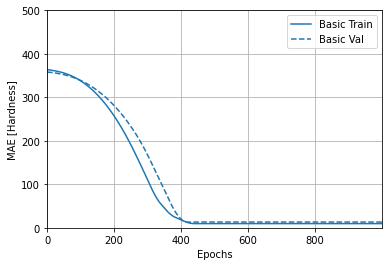

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 500])
plt.ylabel('MAE [Hardness]')   #mean_absolute_error
plt.savefig('name.pdf')
files.download('name.pdf')

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

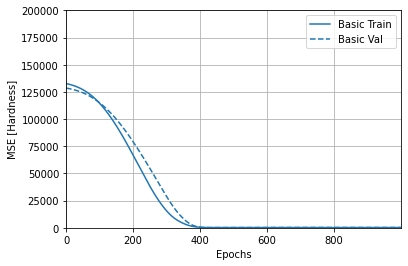

In [0]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0, 200000])
plt.ylabel('MSE [Hardness]') #mean_squared_error
plt.savefig('name.pdf')
files.download('name.pdf')


# Model with early stopping

In [0]:
model1 = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model1.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:132824.2656,  mae:363.8749,  mse:132824.2656,  val_loss:128602.2969,  val_mae:358.3323,  val_mse:128602.2969,  
....................................................................................................
Epoch: 100, loss:114804.6172,  mae:338.3788,  mse:114804.6172,  val_loss:114594.9375,  val_mae:338.2816,  val_mse:114594.9375,  
....................................................................................................
Epoch: 200, loss:67624.1562,  mae:259.1809,  mse:67624.1562,  val_loss:77044.2500,  val_mae:277.2894,  val_mse:77044.2500,  
....................................................................................................
Epoch: 300, loss:14632.0146,  mae:110.8843,  mse:14632.0146,  val_loss:25480.8223,  val_mae:156.9191,  val_mse:25480.8223,  
....................................................................................................
Epoch: 400, loss:319.5997,  mae:15.3028,  mse:319.5997,  val_loss:319.9056,  val_mae:13.9

# Results of the model with early stopping

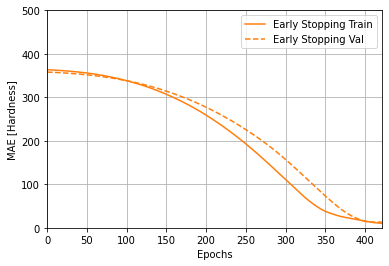

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 500])
plt.ylabel('MAE [Hardness]') #mean_absolute_error
plt.savefig('name.pdf')
files.download('name.pdf')

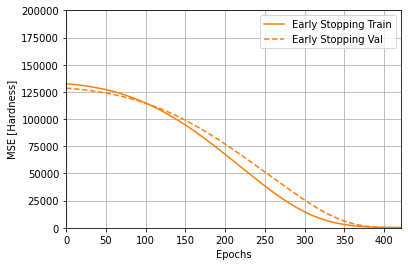

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([0, 200000])
plt.ylabel('MSE [Hardness]') #mean_squared_error
plt.savefig('name.pdf')
files.download('name.pdf')

The graph shows that on the validation set, the average error is usually around +/- 10 Hardness. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

# Training loss

In [0]:
loss, mae, mse = model1.evaluate(normed_train_data, train_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Hardness".format(mae))

24/24 - 0s - loss: 215.4297 - mae: 10.5828 - mse: 215.4297
Testing set Mean Abs Error: 10.58 Hardness


# Test loss

In [0]:
loss, mae, mse = model1.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Hardness".format(mae))


6/6 - 0s - loss: 396.9938 - mae: 15.8764 - mse: 396.9938
Testing set Mean Abs Error: 15.88 Hardness


**Make** **predictions**
#Finally, predict Hardness values using data in the testing set and training set:

# Training plot

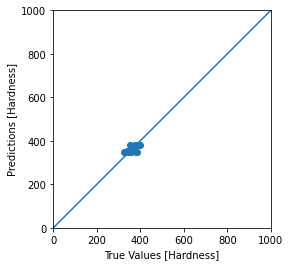

In [0]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [Hardness]')
plt.ylabel('Predictions [Hardness]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.savefig('name.pdf')
files.download('name.pdf')

# Test plot

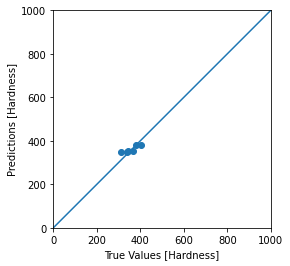

In [0]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Hardness]')
plt.ylabel('Predictions [Hardness]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.savefig('name.pdf')
files.download('name.pdf')


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

In [0]:
test_predictions 

array([352.2213 , 352.2213 , 350.12906, 350.12906, 381.4859 , 381.4859 ],
      dtype=float32)

# Corralation coefficient

In [0]:
t=np.corrcoef(test_labels, test_predictions)[0,1]
k=np.corrcoef(train_labels, train_predictions)[0,1]
print('the corralation on the training set is',t,'and that on the test set is',k)

the corralation on the training set is 0.8306768843326136 and that on the test set is 0.6676458243571554


# Percentage Errors on the predictions

The percentage error is defined as follows:

$$PE= 100\times \Big| \dfrac{TV-PV}{TV}\Big |$$

Where $TV$, $PV$ are the true values and the predicted value respectively.

In [0]:
error1 = 100*(np.abs(test_predictions - test_labels))/test_labels
error2=100*(np.abs(train_predictions - train_labels))/train_labels

In [0]:
error1

0      2.479288
3      3.659378
12    12.944858
15     3.191588
21     0.655911
25     4.961161
Name: Hardness, dtype: float64

In [0]:
error2

2     0.148227
28    1.136241
13    5.524129
10    0.727577
26    3.883623
24    0.153820
27    2.855640
11    7.732018
17    0.640718
22    0.285463
5     2.915845
16    9.316483
8     1.310924
14    0.065464
23    2.083463
20    7.764379
1     0.605916
29    3.445735
6     1.255589
4     4.361871
18    8.295165
19    1.566191
9     2.485794
7     1.338568
Name: Hardness, dtype: float64

In [0]:
test_predictions

array([352.2213 , 352.2213 , 350.12906, 350.12906, 381.4859 , 381.4859 ],
      dtype=float32)

Conclusion
This notebook introduced a few techniques to handle a regression problem.

Mean Squared Error (MSE) is a common loss function used for regression problems 
(different loss functions are used for classification problems).

Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).

When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.

Early stopping is a useful technique to prevent overfitting.

# Model with regularization